Task 1: Setup and Basic Extraction
Objective:
Install the necessary tools and libraries, and extract frame information from a video.
Steps:
1.	Install ffmpeg and ffmpeg-python:
o	Install the ffmpeg tool and the ffmpeg-python library.
2.	Extract Frame Information:
o	Extract frame information from a sample video.

In [2]:
pip install ffmpeg-python

In [6]:
# Install ffmpeg
!apt update
!apt install -y ffmpeg

# Install ffmpeg-python
!pip install ffmpeg-python

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
48 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as 

In [9]:
import ffmpeg
import os
def get_video_info(video_path):
    # Use ffmpeg to probe the video file
    probe = ffmpeg.probe(video_path)
    # Extract stream information
    video_stream = next(stream for stream in probe['streams'] if stream['codec_type'] == 'video')
    # Get desired frame information
    frame_rate = eval(video_stream['r_frame_rate'])  # Convert the frame rate to a float
    duration = float(video_stream['duration'])
    frame_count = int(video_stream['nb_frames'])
    width = int(video_stream['width'])
    height = int(video_stream['height'])
    # Print the information
    print(f"Frame Rate: {frame_rate} fps")
    print(f"Duration: {duration} seconds")
    print(f"Frame Count: {frame_count} frames")
    print(f"Resolution: {width}x{height} pixels")
    return frame_rate, duration, frame_count, width, height
def extract_frames(video_path, output_folder):
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    # Build the ffmpeg command to extract frames
    (
        ffmpeg
        .input(video_path)
        .output(os.path.join(output_folder, 'frame_%04d.png'), start_number=0)
        .run(capture_stdout=True, capture_stderr=True)
    )
    print(f"Frames extracted to {output_folder}")
# Replace 'sample_video.mp4' with the path to your video file
video_path = '/content/130414-746934884_large.mp4'
output_folder = '/content/FRAMES'
# Extract video information
get_video_info(video_path)
# Extract frames and save them to the specified folder
extract_frames(video_path, output_folder)

Frame Rate: 29.97002997002997 fps
Duration: 22.821667 seconds
Frame Count: 684 frames
Resolution: 1920x1080 pixels
Frames extracted to /content/FRAMES


Task 2: Frame Type Analysis
Objective:
Analyze the extracted frame information to understand the distribution of I, P, and B frames in a video.
Steps:
1.	Modify the Script:
o	Count the number of I, P, and B frames.
o	Calculate the percentage of each frame type in the video.
2.	Analyze Frame Distribution:
o	Plot the distribution of frame types using a library like matplotlib.
o	Plot a pie chart or bar graph showing the distribution of frame types using matplotlib.


I-Frames: 8 (1.17%)
P-Frames: 182 (26.61%)
B-Frames: 494 (72.22%)


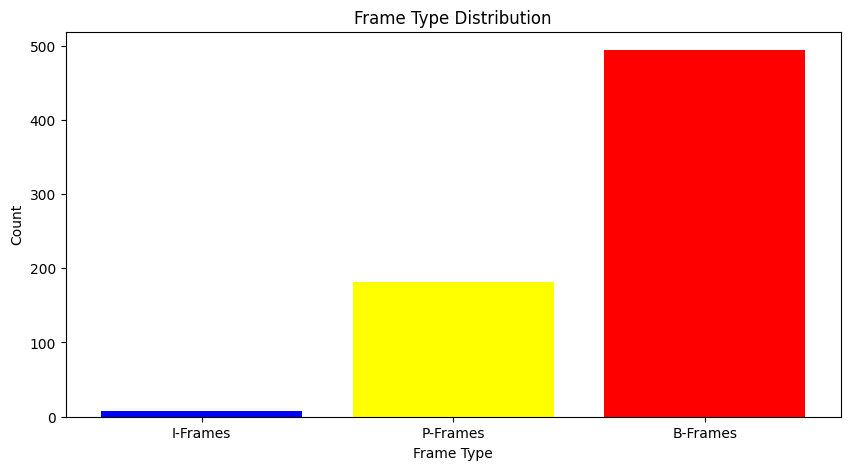

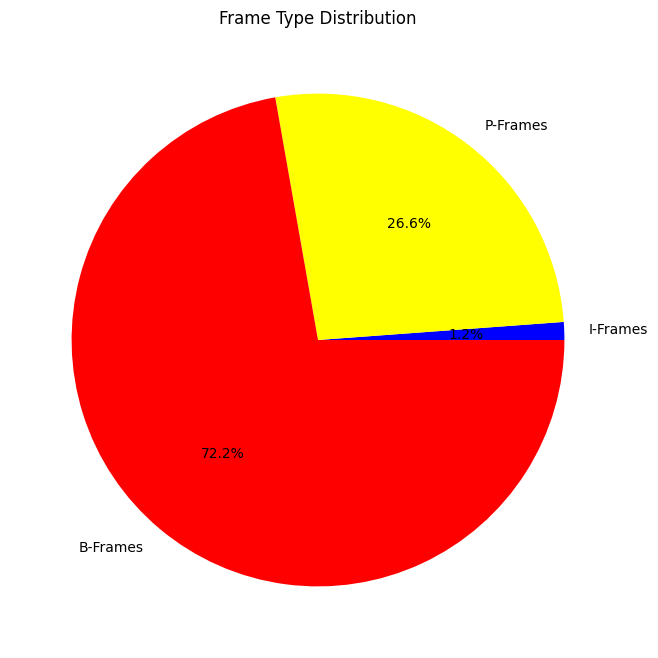

In [10]:
import ffmpeg
import matplotlib.pyplot as plt

def count_frame_types(video_path):
    # Use ffmpeg to count I, P, and B frames
    result = ffmpeg.probe(video_path, select_streams='v', show_frames=None, show_entries='frame=pict_type')
    frames = result['frames']
    # Count the number of I, P, B frames
    frame_types = {'I': 0, 'P': 0, 'B': 0}
    for frame in frames:
        frame_type = frame['pict_type']
        frame_types[frame_type] += 1
    total_frames = sum(frame_types.values())
    percentages = {frame_type: (count / total_frames) * 100 for frame_type, count in frame_types.items()}
    print(f"I-Frames: {frame_types['I']} ({percentages['I']:.2f}%)")
    print(f"P-Frames: {frame_types['P']} ({percentages['P']:.2f}%)")
    print(f"B-Frames: {frame_types['B']} ({percentages['B']:.2f}%)")
    return frame_types, percentages
def plot_frame_distribution(frame_types, percentages):
    labels = ['I-Frames', 'P-Frames', 'B-Frames']
    counts = [frame_types['I'], frame_types['P'], frame_types['B']]
    percent_values = [percentages['I'], percentages['P'], percentages['B']]
    # Bar Plot
    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color=['blue', 'yellow', 'red'])
    plt.xlabel('Frame Type')
    plt.ylabel('Count')
    plt.title('Frame Type Distribution')
    plt.show()

    # Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['blue', 'yellow', 'red'])
    plt.title('Frame Type Distribution')
    plt.show()
video_path = '/content/130414-746934884_large.mp4'
# Count frame types and calculate percentages
frame_types, percentages = count_frame_types(video_path)
# Plot the distribution of frame types
plot_frame_distribution(frame_types, percentages)

Task - 3 Visualizing frames
1.	Save I, P, and B frames as separate image files using ffmpeg.
2.	Use PIL or opencv-python to load and display these frames in a Python script.
3.	Compare the visual quality of I, P, and B frames.


In [12]:
import ffmpeg
import os
from PIL import Image

# Function to extract specific frame types (I, P, B) and save them as images
def extract_frames_by_type(video_path, output_folder, frame_type):
    os.makedirs(output_folder, exist_ok=True)
    (
        ffmpeg
        .input(video_path)
        .output(f'{output_folder}/frame_%04d.png', vf=f'select=eq(pict_type\\,{frame_type})', vsync='vfr')
        .run()
    )
    print(f"{frame_type} frames extracted and saved to {output_folder}")

# Function to display frames using PIL (Pillow)
def display_frames(folder_path):
    image_files = [os.path.join(folder_path, img) for img in os.listdir(folder_path) if img.endswith('.png')]
    for image_file in image_files:
        img = Image.open(image_file)
        img.show()

# Path to your video file
video_path = '/content/130414-746934884_large.mp4'

# Output directories for I, P, and B frames
output_folders = {
    'I': '/content/I_FRAMES',
    'P': '/content/P_FRAMES',
    'B': '/content/B_FRAMES'
}

# Extract and display I, P, and B frames
for frame_type, folder in output_folders.items():
    extract_frames_by_type(video_path, folder, frame_type)
    display_frames(folder)

I frames extracted and saved to /content/I_FRAMES
P frames extracted and saved to /content/P_FRAMES
B frames extracted and saved to /content/B_FRAMES


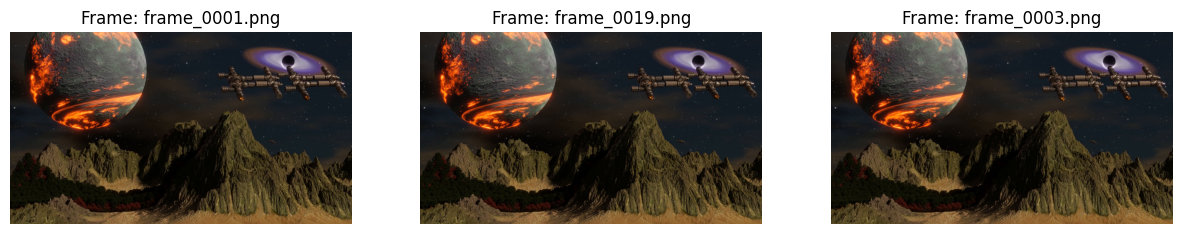

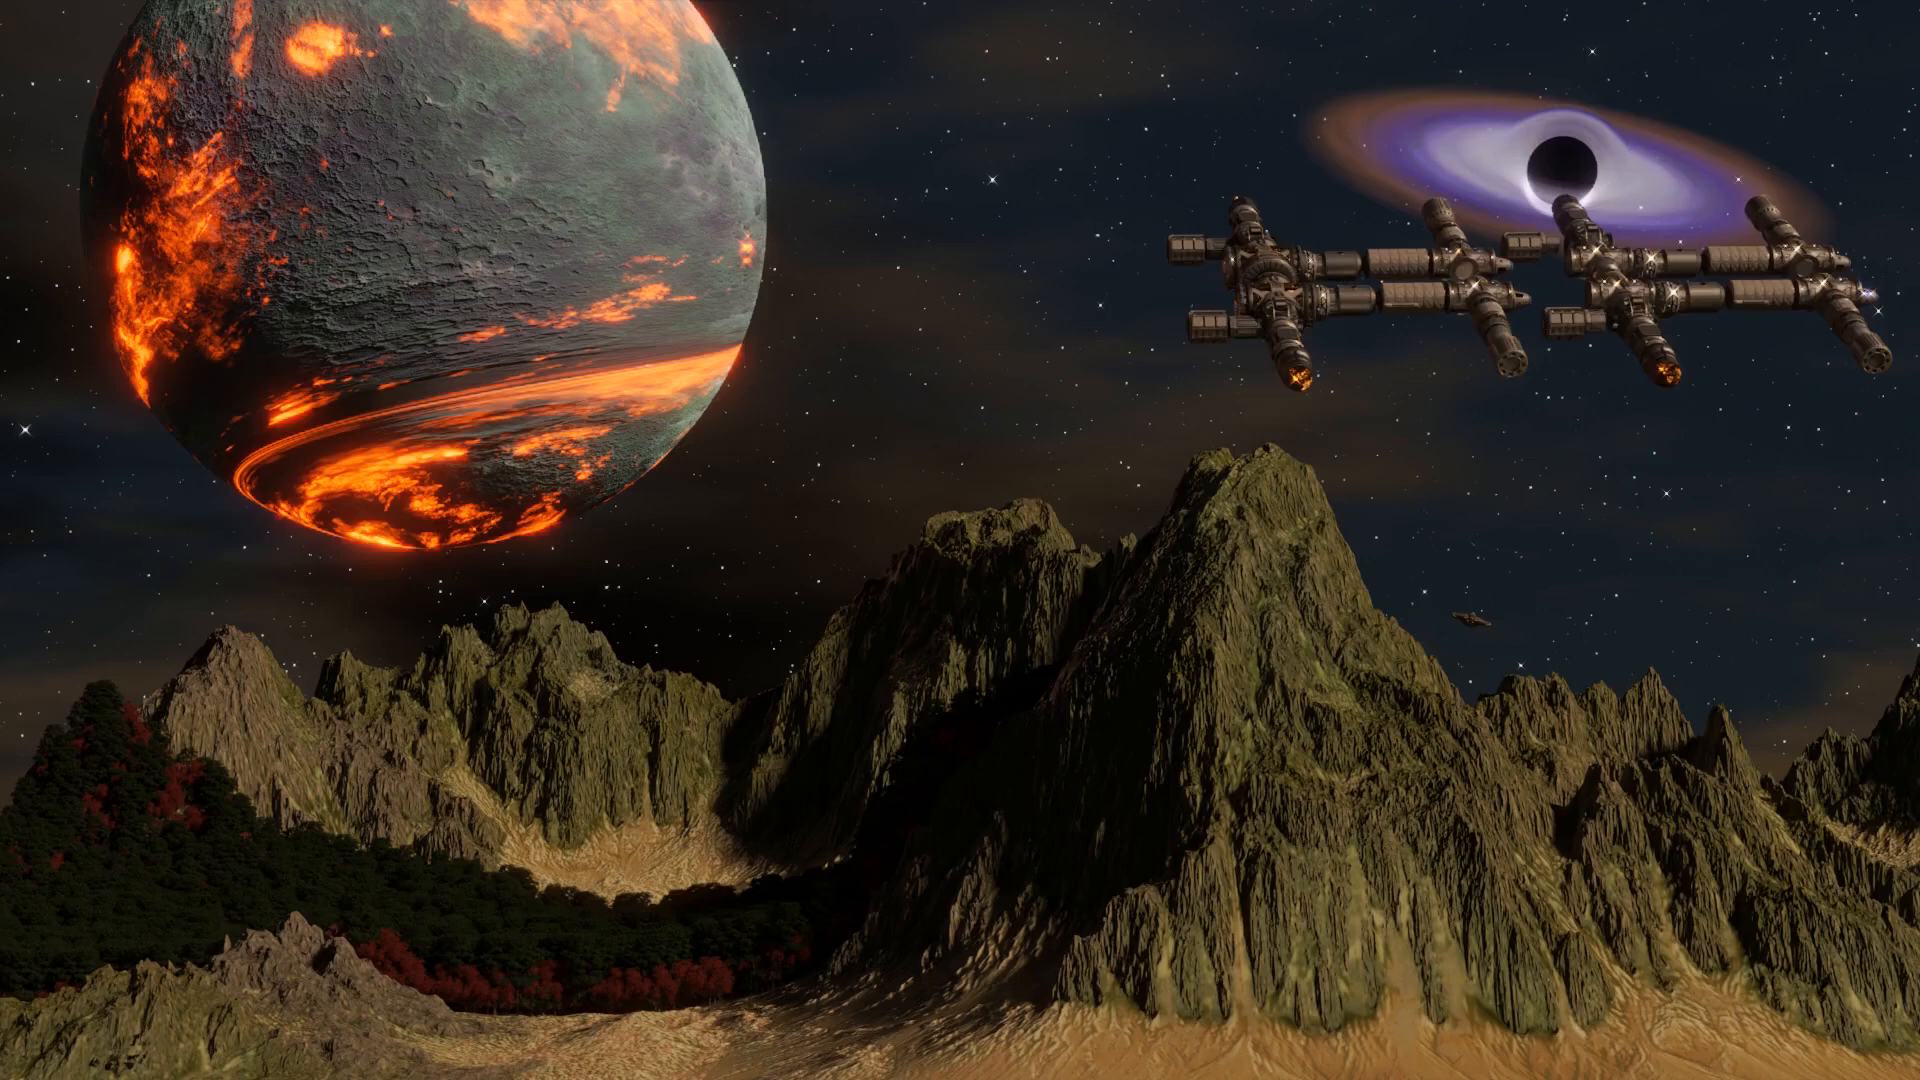

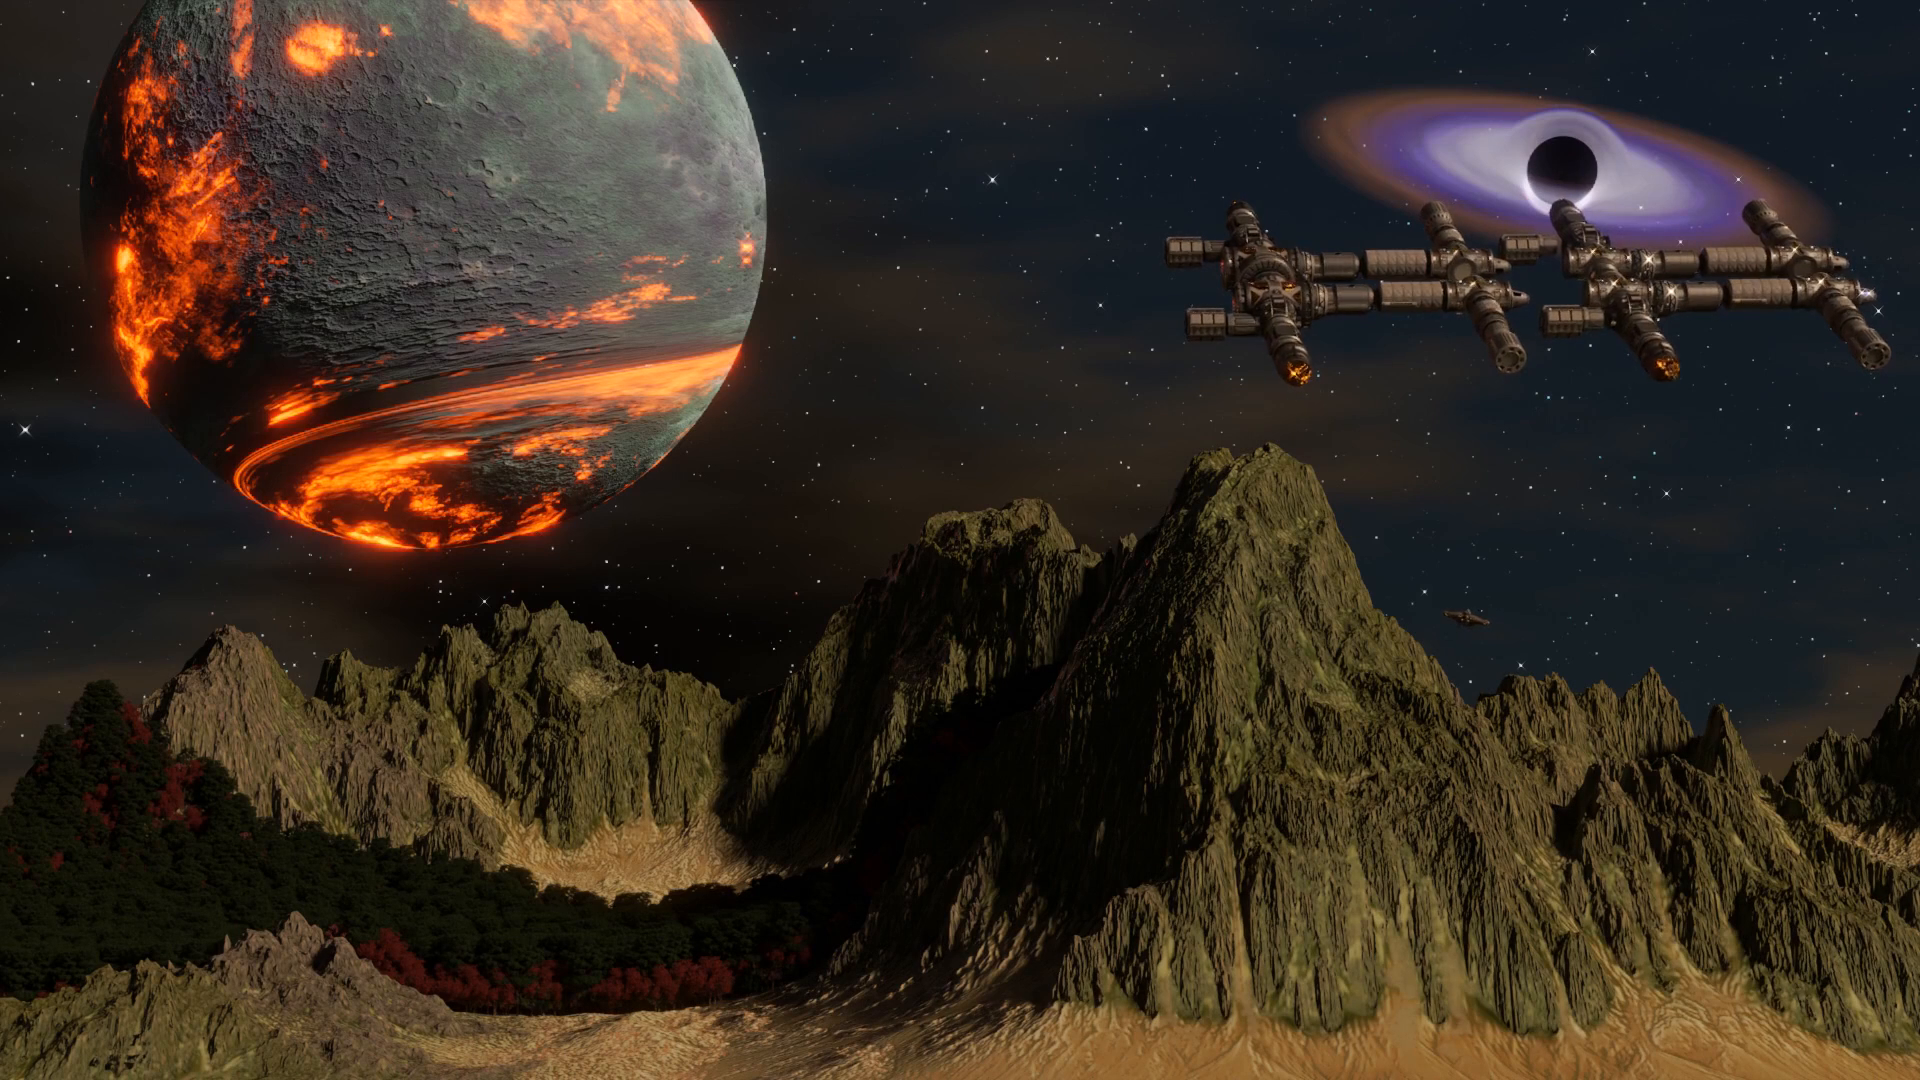

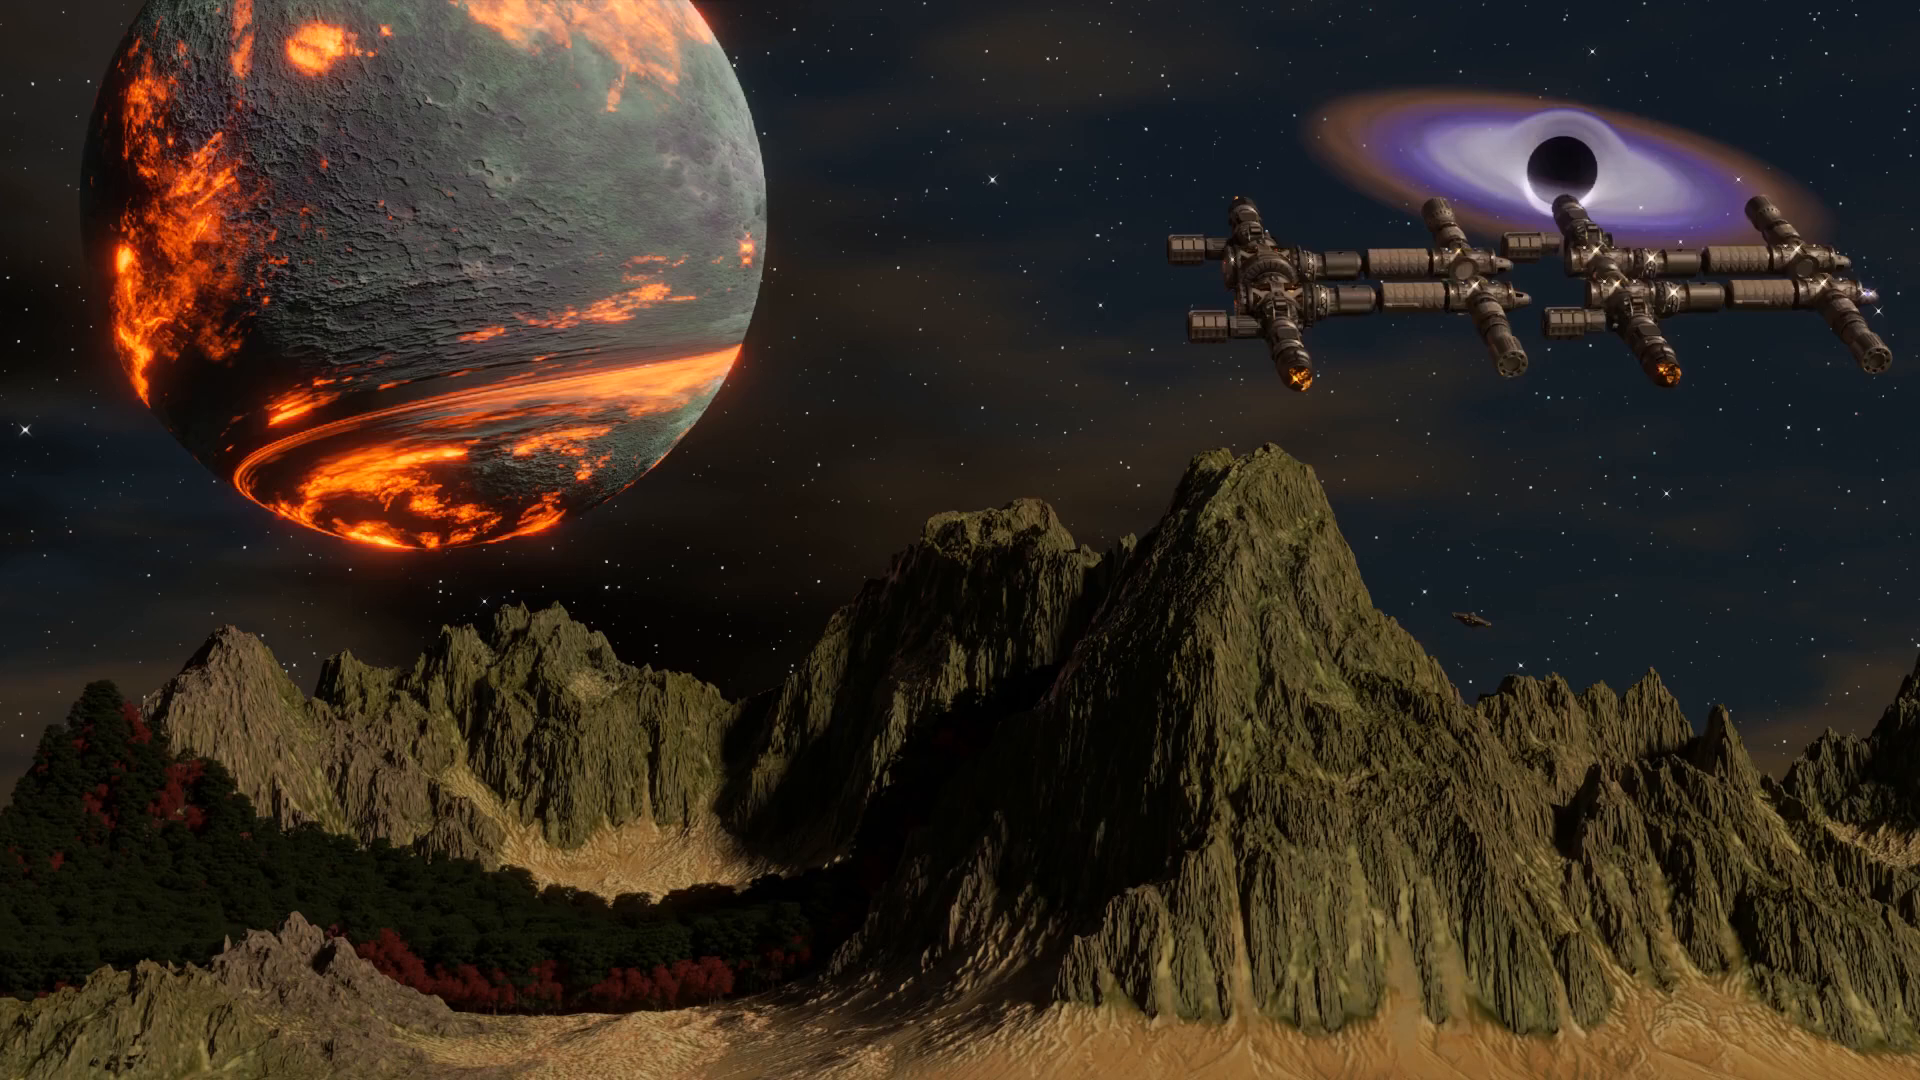

In [13]:
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Function to load and display frames using PIL (Pillow)
def display_frames_pil(frame_paths):
    plt.figure(figsize=(15, 5))
    for i, frame_path in enumerate(frame_paths):
        img = Image.open(frame_path)
        plt.subplot(1, len(frame_paths), i+1)
        plt.imshow(img)
        plt.title(f"Frame: {os.path.basename(frame_path)}")
        plt.axis('off')
    plt.show()

# Function to load and display frames using OpenCV in Google Colab
def display_frames_opencv(frame_paths):
    for frame_path in frame_paths:
        img = cv2.imread(frame_path)
        cv2_imshow(img)

# Paths to the extracted frames (replace these with your paths)
i_frame_path = '/content/I_FRAMES/frame_0001.png'
p_frame_path = '/content/P_FRAMES/frame_0019.png'
b_frame_path = '/content/B_FRAMES/frame_0003.png'

# Load and display frames side by side for comparison
frame_paths = [i_frame_path, p_frame_path, b_frame_path]

# Option 1: Display using PIL (Pillow)
display_frames_pil(frame_paths)

# Option 2: Display using OpenCV in Google Colab
display_frames_opencv(frame_paths)

In [18]:
import os
from skimage import io
from skimage.metrics import structural_similarity as ssim

def get_file_size(file_path):
    """Returns the file size in bytes."""
    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        print(f"Error: File not found at {file_path}")
        return None

def calculate_ssim(image_path1, image_path2, data_range):
    """Calculates the SSIM between two images."""
    image1 = io.imread(image_path1, as_gray=True)
    image2 = io.imread(image_path2, as_gray=True)
    ssim_index, _ = ssim(image1, image2, data_range=data_range, full=True)
    return ssim_index

# Paths
i_frame_path = '/content/I_FRAMES/frame_0001.png'
p_frame_path = '/content/P_FRAMES/frame_0001.png'
b_frame_path = '/content/B_FRAMES/frame_0001.png'

# Getting sizes
i_frame_size = get_file_size(i_frame_path)
p_frame_size = get_file_size(p_frame_path)
b_frame_size = get_file_size(b_frame_path)

print(f"I-frame size: {i_frame_size / 1024:.2f} KB")
print(f"P-frame size: {p_frame_size / 1024:.2f} KB")
print(f"B-frame size: {b_frame_size / 1024:.2f} KB")

# Assuming 8-bit images
data_range = 255

# Calculating SSIM
ssim_p_vs_i = calculate_ssim(i_frame_path, p_frame_path, data_range)
ssim_b_vs_i = calculate_ssim(i_frame_path, b_frame_path, data_range)
ssim_b_vs_p = calculate_ssim(p_frame_path, b_frame_path, data_range)

print(f"SSIM between I-frame and P-frame: {ssim_p_vs_i:.4f}")
print(f"SSIM between I-frame and B-frame: {ssim_b_vs_i:.4f}")
print(f"SSIM between P-frame and B-frame: {ssim_b_vs_p:.4f}")

I-frame size: 2701.62 KB
P-frame size: 2709.28 KB
B-frame size: 2704.44 KB
SSIM between I-frame and P-frame: 1.0000
SSIM between I-frame and B-frame: 1.0000
SSIM between P-frame and B-frame: 1.0000


Task 4: Frame Compression Analysis
Objective:
Analyze the compression efficiency of I, P, and B frames.
Steps:
1.	Calculate Frame Sizes:
o	Calculate the file sizes of extracted I, P, and B frames.
o	Compare the average file sizes of each frame type.
2.	Compression Efficiency:
o	Discuss the role of each frame type in video compression.
o	Analyze why P and B frames are generally smaller than I frames.


In [19]:
import os

# Function to calculate the size of a file in bytes
def calculate_file_size(file_path):
    return os.path.getsize(file_path)

# Function to calculate the average size of frames in a folder
def calculate_average_frame_size(folder_path):
    frame_sizes = []
    for frame_file in os.listdir(folder_path):
        if frame_file.endswith('.png'):  # Assuming frames are saved as .png
            frame_path = os.path.join(folder_path, frame_file)
            frame_size = calculate_file_size(frame_path)
            frame_sizes.append(frame_size)
    average_size = sum(frame_sizes) / len(frame_sizes) if frame_sizes else 0
    return average_size, frame_sizes

# Paths to the extracted frames (replace these with your paths)
i_frames_folder = '/content/I_FRAMES'
p_frames_folder = '/content/P_FRAMES'
b_frames_folder = '/content/B_FRAMES'

# Calculate average frame sizes
i_avg_size, i_frame_sizes = calculate_average_frame_size(i_frames_folder)
p_avg_size, p_frame_sizes = calculate_average_frame_size(p_frames_folder)
b_avg_size, b_frame_sizes = calculate_average_frame_size(b_frames_folder)

# Print results
print(f"Average I-Frame Size: {i_avg_size / 1024:.2f} KB")
print(f"Average P-Frame Size: {p_avg_size / 1024:.2f} KB")
print(f"Average B-Frame Size: {b_avg_size / 1024:.2f} KB")

Average I-Frame Size: 2833.90 KB
Average P-Frame Size: 2877.07 KB
Average B-Frame Size: 2874.79 KB


Task 5: Advanced Frame Extraction
Objective:
Extract frames from a video and reconstruct a part of the video using only I frames.
Steps:
1.	Extract and Save I Frames:
o	Extract I frames from the video and save them as separate image files.
2.	Reconstruct Video:
o	Use the extracted I frames to reconstruct a portion of the video.
o	Create a new video using these I frames with a reduced frame rate.


In [20]:
import os
import subprocess

def reconstruct_video_from_i_frames(i_frames_folder, output_video_path, frame_rate=30):
    try:
        subprocess.run(['ffmpeg', '-version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
    except subprocess.CalledProcessError:
        raise RuntimeError("FFmpeg is not installed or not found in the system path.")
    if not os.path.isdir(i_frames_folder):
        raise FileNotFoundError(f"The directory {i_frames_folder} does not exist.")
    i_frames = [f for f in os.listdir(i_frames_folder) if os.path.isfile(os.path.join(i_frames_folder, f))]
    if not i_frames:
        raise FileNotFoundError(f"No files found in the directory {i_frames_folder}.")
    i_frames.sort()
    with open('frames_list.txt', 'w') as file:
        for frame in i_frames:
            file.write(f"file '{os.path.join(i_frames_folder, frame)}'\n")
    command = [
        'ffmpeg',
        '-f', 'concat',
        '-safe', '0',
        '-i', 'frames_list.txt',
        '-framerate', str(frame_rate),
        '-c:v', 'libx264',
        '-pix_fmt', 'yuv420p',
        output_video_path
    ]

    subprocess.run(command, check=True)
    os.remove('frames_list.txt')
i_frames_folder = '/content/I_FRAMES'
output_video_path = 'output_reconstructed_video.mp4'
reconstruct_video_from_i_frames(i_frames_folder, output_video_path, frame_rate=15)